# BENG123: Final Project
## Part 2: Integrate Enzyme Module(s) into the RBC metabolic network

<font color='red'>**IMPORTANT NOTES:**</font>  
* **The IPYNB files must run from top to bottom without errors. We will run your notebook using the following steps: $$\text{"Kernel}\ \rightarrow\ \text{Restart and Run all"}$$**
* **Make sure you are using the correct versions of packages if you are working outside of JupyterHub
<font color='red'>(masspy==0.1.6, libroadrunner==2.1.3)</font>**
* **Do not leave unneccessary code/comments in the final notebook submission as unorganized code may result in loss of points.**

Be sure to include code (e.g., print statements) where necessary to display steps that match up with the rubric.

**Recommendation:** It is recommended to download the template(s) for the Enzyme Module(s) that you want to reconstruct. Construct the enzyme module in a seperate notebook and perform the integration in this notebook.

This is especially important if you plan on doing creating more than one enzyme module.

### Import Packages

In [8]:
from mass.io.json import load_json_model, save_json_model
from mass import Simulation, strip_time
from mass.visualization import plot_time_profile, plot_phase_portrait
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mass.io import json, sbml
from pathlib import Path

pd.set_option('display.max_columns', None)

### 1. Import models
Import the RBC model from Part 1 and any EnzymeModules constructed from the `models` directory.

In [2]:
# Get current directory and set up paths
current_dir = os.getcwd()
print(f"Current Directory is: {current_dir}")

# Navigate to parent directory and set paths
parent_dir = os.path.dirname(current_dir)
models_dir = os.path.join(parent_dir, "models")
enzymes_dir = os.path.join(parent_dir, "enzymes")

print(f"Models directory: {models_dir}")
print(f"Enzymes directory: {enzymes_dir}")


Current Directory is: /Users/nick/Desktop/GitHub/RBC Simulations/notebooks
Models directory: /Users/nick/Desktop/GitHub/RBC Simulations/models
Enzymes directory: /Users/nick/Desktop/GitHub/RBC Simulations/enzymes


In [3]:
# 1. Import models
RBC = load_json_model(os.path.join(models_dir, "RBC_core.json"))
PGK = load_json_model(os.path.join(enzymes_dir, "PGK.json"))

print(f"\nRBC model loaded: {len(RBC.reactions)} reactions, {len(RBC.metabolites)} metabolites")
print(f"PGK module loaded: {len(PGK.reactions)} reactions, {len(PGK.metabolites)} metabolites")



RBC model loaded: 53 reactions, 48 metabolites
PGK module loaded: 9 reactions, 13 metabolites


### 1. Integrate Enzyme Modules into RBC model

In [4]:
RBC_PGK = RBC.merge(PGK, inplace = False)
RBC_PGK.remove_reactions([RBC_PGK.reactions.PGK])

print(f"\nIntegrated model: {len(RBC_PGK.reactions)} reactions, {len(RBC_PGK.metabolites)} metabolites")
print("Original PGK reaction removed and replaced with enzyme module")



Integrated model: 61 reactions, 56 metabolites
Original PGK reaction removed and replaced with enzyme module


### 2. Determine the Steady State

In [5]:
sim_PGK = Simulation(RBC_PGK)
t0, tf = (0, 1e4)

conc_sol_ss, flux_sol_ss = sim_PGK.find_steady_state(
    RBC_PGK, 
    strategy="simulate", 
    update_values=True
)

print(f"\nSteady state found using simulation strategy")
print(f"Time range: {t0} to {tf} hours")

ERROR! Session/line number was not unique in database. History logging moved to new session 6

Steady state found using simulation strategy
Time range: 0 to 10000.0 hours


### 3. Graphically verify the steady state

/var/folders/_1/sc2gnkk90sx6mjw6rhzl7r_h0000gn/T/ipykernel_29507/27686803.py:16 UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.


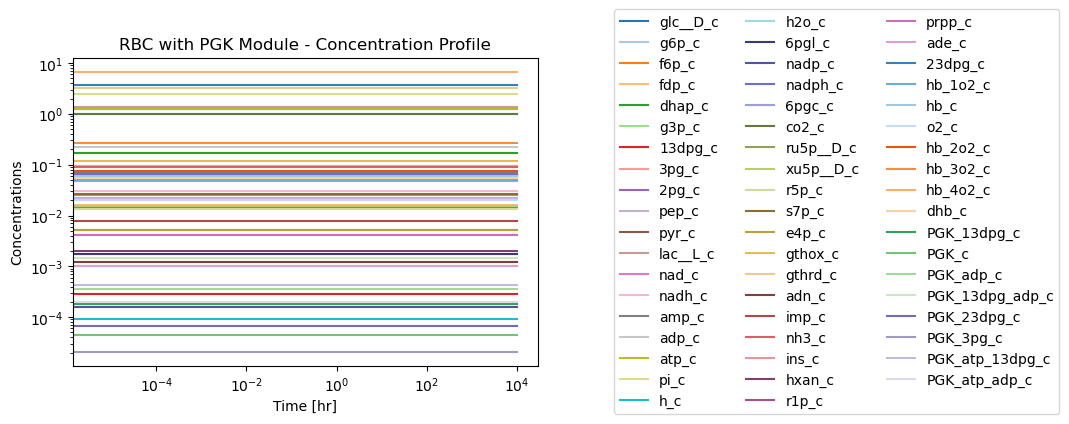


Concentration profile plotted - verify steady state reached


In [6]:
conc_sol_ss, flux_sol_ss = sim_PGK.simulate(
    RBC_PGK, time=(t0, tf))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

plot_time_profile(
    conc_sol_ss, 
    ax=ax,
    plot_function="loglog",
    xlabel="Time [hr]", 
    ylabel="Concentrations",
    title=("RBC with PGK Module - Concentration Profile", {"size": "large"}),
    legend="right outside"
)

plt.tight_layout()
plt.show()

print("\nConcentration profile plotted - verify steady state reached")


### Export Model

Export your RBC model to the `models` directory.

In [9]:
save_json_model(
    mass_model=RBC_PGK,
    filename=os.path.join(models_dir, "RBC_PGK.json")
)

print(f"\nIntegrated model exported to {os.path.join(models_dir, 'RBC_PGK.json')}")
print("Integration complete!")


Integrated model exported to /Users/nick/Desktop/GitHub/RBC Simulations/models/RBC_PGK.json
Integration complete!
